<center>
<img src="logo.png" height="900"> 
</center>


#  Распределения

В этом задании мы немного поработаем в python с разными случайными величинами. Делать это задание необязательно, но рекомендуется. 

In [4]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')  # стиль для графиков
%matplotlib inline

## Упражнение 1 

> Нормальность восстановлена, мы на орбите Магратеи (Автостопом по галактике) 

__а)__ Задайте генератор для случайной величины имеющей нормальное распределение: $X \sim N(4, 10^2)$. 

In [5]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

norm_rv = sts.norm(4, 10)

__б)__ Найдите вероятности $P(X > 4)$, $P(X \in [2; 20])$, $P(X < −5)$. Запишите их в переменные `p1, p2, p3`. 

In [7]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

p1 = 1 - norm_rv.cdf(4) 
p2 = norm_rv.cdf(20) - norm_rv.cdf(2)
p3 = norm_rv.cdf(-5)
print(p1, p2, p3)


0.5 0.5244604177395451 0.18406012534675947


In [8]:
# Проверка корректно ли вы нашли вероятности :) 
# Задание необязательное, поэтому все тесты открытые

assert p1 == 0.5
assert np.abs(p2 - 0.5244604) < 1e-5
assert np.abs(p3 - 0.18406012) < 1e-5

__в)__ Найдите число $a$ такое, что $P(X > a) = 0.3$.

In [11]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

a = norm_rv.ppf(1 - 0.3)
print(a)


9.244005127080406


In [10]:
assert np.abs(a - 9.2440051) < 1e-5

__г)__ Найдите число $b$ такое, что $P(X \in [4 - b; 4 + b]) = 0.5$.

In [15]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

b = 4 - norm_rv.ppf(0.25)
print(b)


6.744897501960817


In [16]:
assert np.abs(b - 6.7448975) < 1e-5

__д)__ Сгенерируйте выборку размера $100$. Постройте по этой выборке гистограмму. На том же рисунке изобразите плотность распределения нормальной случайной величины. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


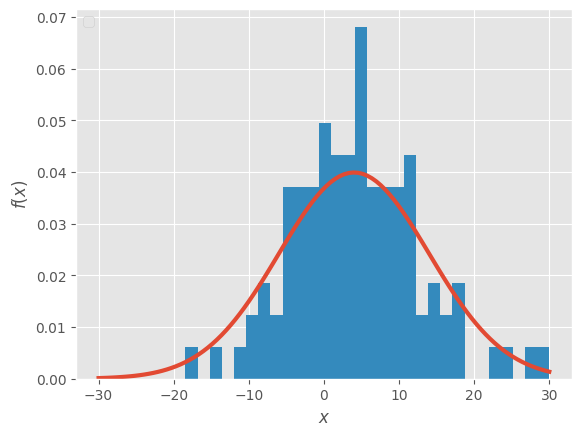

In [25]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

sample = norm_rv.rvs(100)
x = np.linspace(-30, 30, 100)
pdf = norm_rv.pdf(x)

plt.plot(x, pdf, lw=3)
plt.hist(sample, bins=30, density=True)

plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper left');

__е)__ Оцените эмпирическую функцию распределения. Изобразите её и теоретическую функцию распределения на графике. 

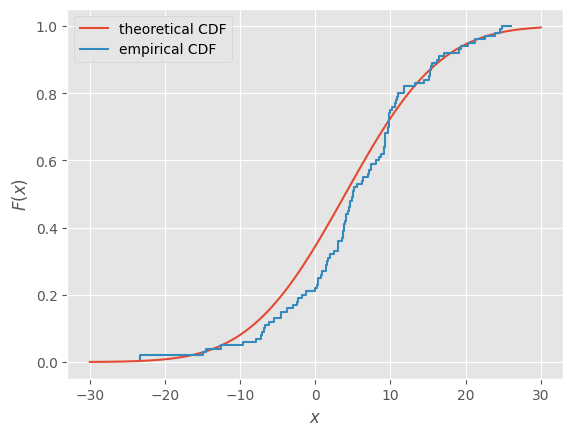

In [23]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
from statsmodels.distributions.empirical_distribution import ECDF

x = np.linspace(-30, 30, 100)

# теоретическа cdf 
cdf = norm_rv.cdf(x)
plt.plot(x, cdf, label='theoretical CDF')

# эмпирическая сdf
ecdf = ECDF(sample)
plt.step(ecdf.x, ecdf.y, label='empirical CDF')

plt.ylabel('$F(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper left');

## Упражнение 2 

> Звёзды лучше видны с крыши, полезай и проверь сам. Ты так ждал этот знак свыше, и отметил его как спам. (Дайте танк) 

Пусть количество писем со спамом, которое пришло к нам на почту, имеет распределение Пуассона. Предположим, что вы получаете в среднем три спам-письма в день. Какова доля дней, в которые вы получаете пять или больше спам-писем?

In [29]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

p = 1 - sts.poisson.cdf(4, 3)



In [30]:
assert np.abs(p - 0.1847367) < 1e-5

## Упражнение 3 

Во время ЧЕ по футболу 2008 года и ЧМ 2010 года Осьминог Пауль занимался прогнозированием побед (после он ушёл в финансовую аналитику и IB). Осьминог дал верные прогнозы в 12 случаях из 14. Если предположить, что Пауль выбирает победителя наугад, какова вероятность получить 12 верных прогнозов из 14?

In [43]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

from math import comb

n = 14 
k = 12  
p = 0.5  

prob1 = comb(n, k) * (p**k) * ((1-p)**(n-k))


In [44]:
assert np.abs(prob1 - 0.0055541) < 1e-5

Если предположить, что Осьминог правильно выбирает победителя с вероятностью $0.9$, какова вероятность получить тот же результат? 

In [45]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

p = 0.9  

prob2 = comb(n, k) * (p**k) * ((1-p)**(n-k))

print(prob2)


0.25701087819770996


In [46]:
assert np.abs(prob - 0.2570108) < 1e-5